Este colab fue desarrollado por Arnold Charry Armero

# Set Covering

Una ciudad se divide en distritos $n$. El tiempo (en minutos) que tarda una ambulancia en viajar del distrito $i$ al distrito $j$ se denota como $d_{ij}$. La población del distrito $i$ (en miles) es $p_{i}$. En la Tabla 2 y la Tabla 3 se muestra un ejemplo.  Las distancias entre los distritos se muestran en la Tabla 2, y la información sobre la población se muestra en la Tabla 3.  En este caso, tenemos $n=8$ distritos. Podemos ver que, por ejemplo, se tarda 5 minutos en viajar del Distrito 2 al Distrito 3, y que hay 40.000 ciudadanos.

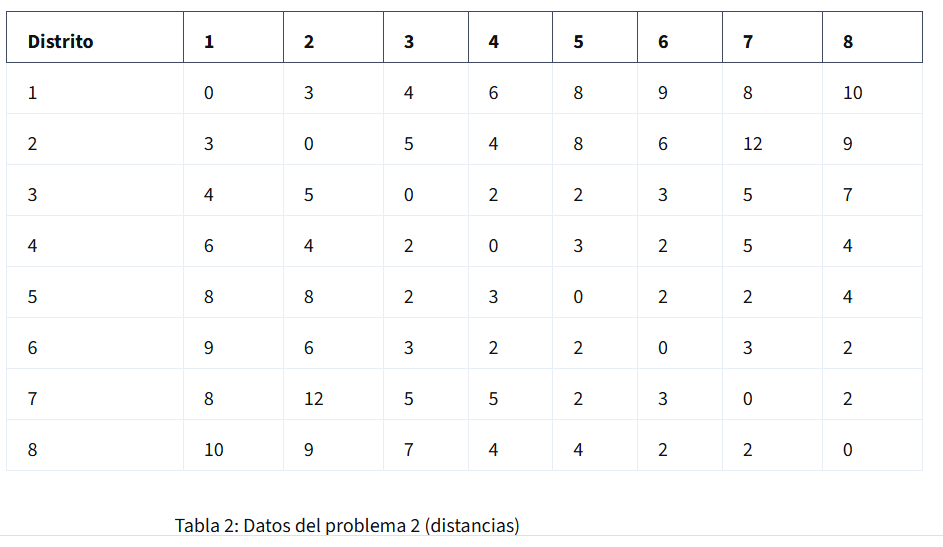

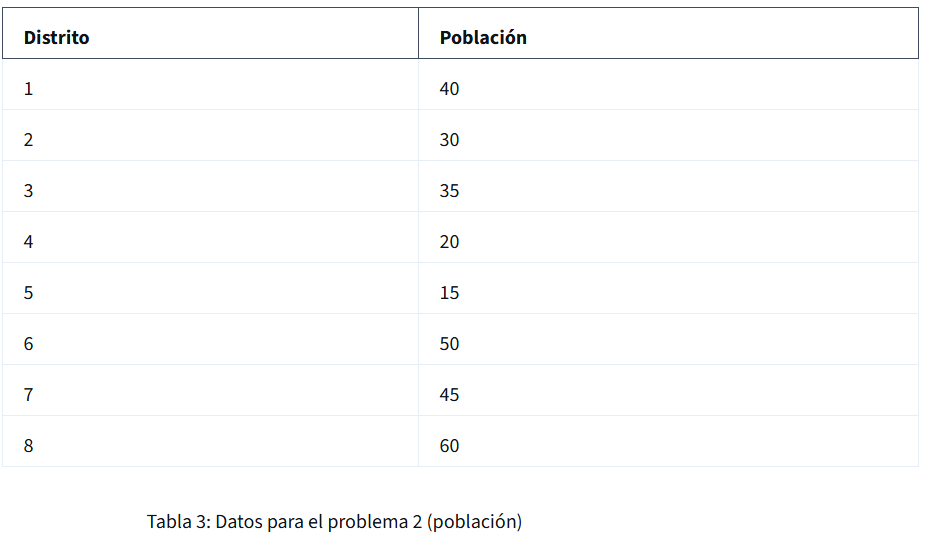

La ciudad dispone de $m$ ambulancias y quiere ubicarlas en
$m$ de los distritos. Para cada distrito, el tiempo de extinción ponderado por la población se define como el producto de la población del distrito por el tiempo que tarda la ambulancia más cercana en desplazarse hasta él. El responsable de la toma de decisiones pretende ubicar las ambulancias de
$m$ para minimizar el tiempo máximo de extinción ponderado por la población entre todos los distritos. Para este caso $m = 2$. Para este problema, formule un programa entero que pueda minimizar el tiempo máximo de extinción de incendios ponderado por la población entre todos los distritos. Escriba los tiempos máximos de extinción de incendios ponderados por la población minimizados entre todos los distritos de los dos distritos en los que deberían ubicarse las ambulancias (es decir, el valor objetivo de una solución óptima).

## Función Objetivo

$$\min \sum_{i=1}^{n} w_i$$

## Restricciones

Tiene que haber el número solicitado de ambulancias,

$$ \sum_{j=1}^{n} x_j = m $$

Si no hay ambulancia en el distrito $j$, entonces no cubre el distrito ${ij}$,

$$ y_{ij} \le x_j \qquad \forall\, i = 1,\ldots,n,\; j = 1,\ldots,n $$

Todos los distritos deben ser cubiertos por una ambulancia,

$$ \sum_{j=1}^{n} y_{ij} = 1 \qquad \forall\, i = 1,\ldots,n $$

Se debe minimizar cada distancia entre cada distrito con ambulancia con cada distrito cubierto,

$$ w_i \ge \sum_{j=1}^{n} d_{ij} y_{ij} \qquad \forall\, i = 1,\ldots,n $$

Las variables $x_{j}$ y $y_{ij}$ son binarias,

$$ x_j, y_{ij} \in \{0,1\} \qquad \forall\, i = 1,\ldots,n,\; j = 1,\ldots,n $$

Cada distancia entre el punto cubierto por la ambulancia debe ser continuo,

$$w_i \ge 0 \qquad \forall\, i = 1,\ldots,n$$



In [ ]:
!pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 70.0 MB/s eta 0:00:00


In [ ]:
# Se importan las librerias
from gurobipy import *
import pandas as pd

In [ ]:
# Conjuntos
distritos1 = range(8)
distritos2 = range(8)

In [ ]:
# Parámetros
d = [[0, 3, 4, 6, 8, 9, 8, 10],
    [3, 0, 5, 4, 8, 6, 12, 9],
    [4, 5, 0, 2, 2, 3, 5, 7],
    [6, 4, 2, 0, 3, 2, 5, 4],
    [8, 8, 2, 3, 0, 2, 2, 4],
    [9, 6, 3, 2, 2, 0, 3, 2],
    [8, 12, 5, 5, 2, 3, 0, 2],
    [10, 9, 7, 4, 4, 2, 2, 0]]

P = [40, 30, 35, 20, 15, 50, 45, 60]

In [ ]:
# Crear la instancia del modelo
model = Model("Set_Covering")

# Inicialización de las variables de decisión
X = model.addVars(distritos2, vtype=GRB.BINARY, name="X")
Y = model.addVars(distritos1, distritos2, vtype=GRB.BINARY, name="Y")
W = model.addVars(distritos1, vtype=GRB.CONTINUOUS, name = "W")

# Agregar la función objetivo
model.setObjective(quicksum(W[i] for i in distritos1), GRB.MINIMIZE)

# Agregar las restricciones

model.addConstr(quicksum(X[j] for j in distritos2) == 2)

for i in distritos1:
  for j in distritos2:
    model.addConstr(Y[i, j] <= X[j], name=f"Compatibilidad_{i}_{j}")

for i in distritos1:
  model.addConstr(quicksum(Y[i, j] for j in distritos2) == 1, name=f"Distrito_cubierto{i}")

for i in distritos1:
  model.addConstr(W[i] >= quicksum(d[i][j] * Y[i, j] for j in distritos2))

# Resolver el problema
model.optimize()

# Imprimir el estado del problema
if model.Status == GRB.OPTIMAL:
    print("Status: Optimal")

# Resultados
for var in model.getVars():
  print(var.VarName, "=", var.X)

print(f"\nFunción Objetivo = {model.objVal:.2f}")

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 81 rows, 80 columns and 264 nonzeros
Model fingerprint: 0xa7ad3470
Variable types: 8 continuous, 72 integer (72 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 43.0000000
Presolve removed 8 rows and 8 columns
Presolve time: 0.00s
Presolved: 73 rows, 72 columns, 200 nonzeros
Variable types: 0 continuous, 72 integer (72 binary)

Root relaxation: objective 1.500000e+01, 36 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0       

Para el caso de $n = 3$ se tiene,

In [ ]:
# Crear la instancia del modelo
model = Model("Set_Covering")

# Inicialización de las variables de decisión
X = model.addVars(distritos2, vtype=GRB.BINARY, name="X")
Y = model.addVars(distritos1, distritos2, vtype=GRB.BINARY, name="Y")
W = model.addVars(distritos1, vtype=GRB.CONTINUOUS, name = "W")

# Agregar la función objetivo
model.setObjective(quicksum(W[i] for i in distritos1), GRB.MINIMIZE)

# Agregar las restricciones

model.addConstr(quicksum(X[j] for j in distritos2) == 3)

for i in distritos1:
  for j in distritos2:
    model.addConstr(Y[i, j] <= X[j], name=f"Compatibilidad_{i}_{j}")

for i in distritos1:
  model.addConstr(quicksum(Y[i, j] for j in distritos2) == 1, name=f"Distrito_cubierto{i}")

for i in distritos1:
  model.addConstr(W[i] >= quicksum(d[i][j] * Y[i, j] for j in distritos2))

# Resolver el problema
model.optimize()

# Imprimir el estado del problema
if model.Status == GRB.OPTIMAL:
    print("Status: Optimal")

# Resultados
for var in model.getVars():
  print(var.VarName, "=", var.X)

print(f"\nFunción Objetivo = {model.objVal:.2f}")

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 81 rows, 80 columns and 264 nonzeros
Model fingerprint: 0xe34c66f6
Variable types: 8 continuous, 72 integer (72 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 43.0000000
Presolve removed 8 rows and 8 columns
Presolve time: 0.00s
Presolved: 73 rows, 72 columns, 200 nonzeros
Variable types: 0 continuous, 72 integer (72 binary)

Root relaxation: objective 1.100000e+01, 29 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0       